## Building a YOLOv3 Object Detector with Darknet in the Cloud! (GPU ENABLED)
Based on: https://github.com/theAIGuysCode/YOLOv3-Cloud-Tutorial

## Step 1: Enabling GPU within the notebook
You need to enable GPU acceleration within your Colab notebook so that your YOLOv3 system will be able to process detections over 100 faster than CPU.

Steps:

i) Click Edit on top left.

ii) Click on notebook setting and select GPU.

## Step 2: Cloning and building Darknet

The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.






In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 13357 (delta 8), reused 13 (delta 4), pack-reused 13331
Receiving objects: 100% (13357/13357), 12.04 MiB | 12.97 MiB/s, done.
Resolving deltas: 100% (9114/9114), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

## Step 2: Define some helper functions that upload, show image, etc.

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Upload the images and txt annotation as a zipped folder (named 'obj') to yolov3 folder in google drive. Then unzip it in google drive.

In [26]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': Operation not supported
'Colab Notebooks'	        images				    yolov3
 DownloadFiles-1.ed	       'New Microsoft Word Document.gdoc'   新文件夹
'Exam 3.zip (Unzipped Files)'  'unknown metal lab report.gdoc'


In [27]:
!ls /mydrive/yolov3

backup		generate_train.py  obj.names  train.txt
bad_label.list	obj.data	   obj.zip    yolov3_custom.cfg


In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [29]:
%cd /content/darknet/data

/content/darknet/data


In [30]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d /content/darknet/data/

Archive:  ../obj.zip
  inflating: /content/darknet/data/obj/1.jpg  
  inflating: /content/darknet/data/obj/1.txt  
  inflating: /content/darknet/data/obj/10.jpg  
  inflating: /content/darknet/data/obj/10.txt  
  inflating: /content/darknet/data/obj/11.jpg  
  inflating: /content/darknet/data/obj/11.txt  
  inflating: /content/darknet/data/obj/12.jpg  
  inflating: /content/darknet/data/obj/12.txt  
  inflating: /content/darknet/data/obj/13.jpg  
  inflating: /content/darknet/data/obj/13.txt  
  inflating: /content/darknet/data/obj/14.jpg  
  inflating: /content/darknet/data/obj/14.txt  
  inflating: /content/darknet/data/obj/15.jpg  
  inflating: /content/darknet/data/obj/15.txt  
  inflating: /content/darknet/data/obj/16.jpg  
  inflating: /content/darknet/data/obj/16.txt  
  inflating: /content/darknet/data/obj/17.jpg  
  inflating: /content/darknet/data/obj/17.txt  
  inflating: /content/darknet/data/obj/18.jpg  
  inflating: /content/darknet/data/obj/18.txt  
  inflating: /content

## Step 3: Configuring files for training

In [0]:
# download cfg to google drive and change its name
#!cp darknet/cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom.cfg

In [0]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
#download('darknet/cfg/yolov3.cfg')

In [0]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg /content/darknet/cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [0]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py /content/darknet

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


In [36]:
%cd /content/darknet

/content/darknet


In [0]:
!python generate_train.py

In [38]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree		   dog.jpg	imagenet.labels.list	  person.jpg
coco9k.map	   eagle.jpg	imagenet.shortnames.list  scream.jpg
coco.names	   giraffe.jpg	labels			  train.txt
darknet53.conv.74  goal.txt	obj			  voc.names
data		   horses.jpg	openimages.names


In [0]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

## Download pre-trained weights for the convolutional layers

In [40]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-05-07 22:48:49--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-05-07 22:48:50--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   431KB/s    in 6m 5s   

2020-05-07 22:54:57 (435 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## Train custom detector for Waldo

In [41]:
# train your custom detector
%cd /content/darknet
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.919758, GIOU: 0.918948), Class: 0.998590, Obj: 0.973604, No Obj: 0.000153, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.000699, iou_loss = 0.004951, total_loss = 0.005651 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.777770, GIOU: 0.764360), Class: 0.999095, Obj: 0.772117, No Obj: 0.000140, .5R: 1.000000, .75R: 0.666667, count: 3, class_loss = 0.140851, iou_loss = 0.075232, total_loss = 0.216083 

 1903: 0.115447, 0.107722 avg loss, 0.000010 rate, 2.493043 seconds, 121792 images, 0.196340 hours left
Loaded: 0.126585 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000004, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse 

## Run Waldo detector

In [42]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

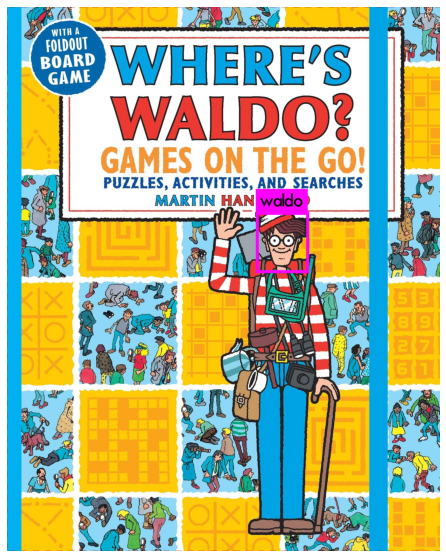

In [43]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/images/wally1.jpg -thresh 0.3
imShow('predictions.jpg')